In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rho_plus as rp

theme, cs = rp.mpl_setup(False)

plt.rcParams['axes.labelcolor'] = plt.rcParams['text.color']
plt.rcParams['legend.labelcolor'] = plt.rcParams['axes.titlecolor']
plt.rcParams['legend.edgecolor'] = plt.rcParams['axes.facecolor']
plt.rcParams['font.family'] = 'Source Han Sans'

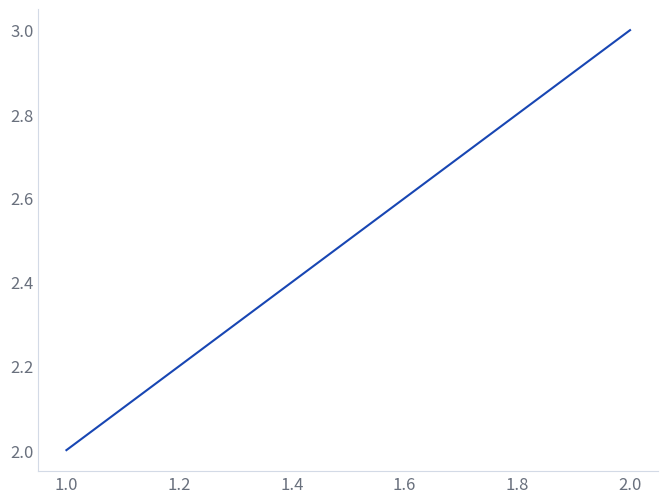

In [125]:
import matplotlib.font_manager as font_manager

font_path = '/home/nmiklaucic/Downloads/SubsetOTF/JP/SourceHanSansJP-Regular.otf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = prop.get_name()

plt.plot([1, 2], [2, 3])

In [126]:
data = pd.read_feather('mpc_full_feats_scaled_split.feather')
data

,comp,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,...,infoY_delta_e,statY_bandgap,infoY_bandgap,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,piezo,dataset_split
0,In1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,2.864847,0.010989,-1.760193,...,False,False,False,False,False,False,False,False,False,1
1,Mg1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.041846,-1.664706,-1.760193,...,False,False,False,False,True,False,False,True,False,0
2,Be1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.670320,-2.027018,-1.760193,...,False,False,False,False,False,False,False,False,False,2
3,Hf1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,4.671710,1.052637,-1.760193,...,False,False,False,False,False,False,False,False,False,1
4,P1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,0.193832,-1.528839,-1.760193,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,Sb2W1O6,-0.302404,0.587564,0.680144,0.747711,0.764994,0.771629,-0.356083,1.143215,1.446811,...,False,False,False,False,False,False,False,False,True,0
84186,Sr1Hf1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.052637,1.349629,...,False,False,False,False,False,False,False,False,True,1
84187,Rb1Ta1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.097926,1.398220,...,False,False,False,False,False,False,False,False,True,1
84188,Ba1Ni1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,0.328012,0.572174,...,False,False,False,False,False,False,False,False,True,0


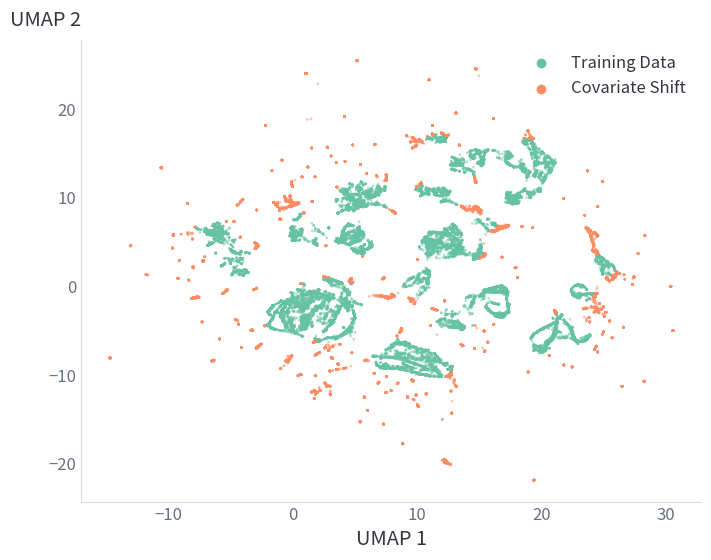

In [127]:
data['Dataset'] = ['Covariate Shift' if x else 'Training Data' for x in data['Xshift_umap']]
test_sets = data.select_dtypes(bool)
data['num_test_sets'] = data[test_sets].sum(axis=1)
data['training'] = data['num_test_sets'] == 0
ax = sns.scatterplot(data.query('training or Xshift_umap'), x='umap_x', y='umap_y', hue='Dataset', ec=None, s=3,
                     legend=False, alpha=0.5, palette='Set2', hue_order=['Training Data', 'Covariate Shift'])

c1, c2 = sns.color_palette('Set2', 2)
plt.scatter([], [], color=c1, label='Training Data')
plt.scatter([], [], color=c2, label='Covariate Shift')
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/umap_dist.png')

/tmp/ipykernel_8499/1700105556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')


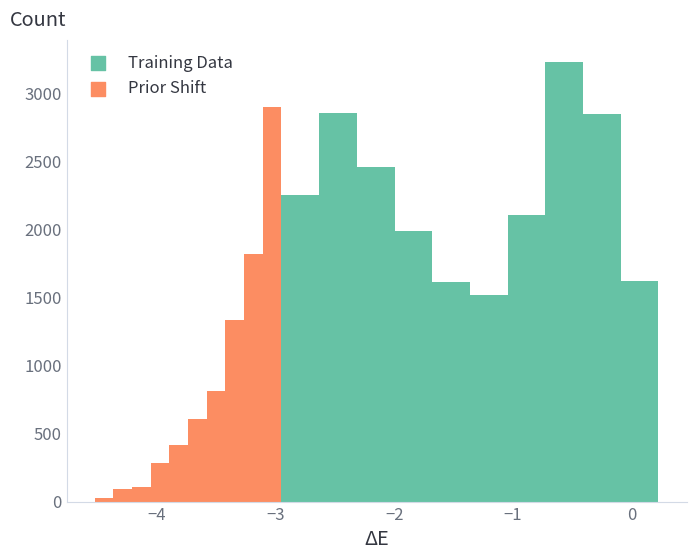

In [128]:
ydata = data.query('training or infoY_delta_e')
ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')

bins = np.hstack([
    np.histogram_bin_edges(ydata.query('infoY_delta_e')['delta_e']),
    np.histogram_bin_edges(ydata.query('training')['delta_e'])
])
alpha = 1
sns.histplot(ydata, x='delta_e', hue='Dataset', bins=bins, palette='Set2', alpha=alpha, ec='black')
plt.scatter([], [], color=c1, label='Training Data', marker='s', s=100, alpha=alpha)
plt.scatter([], [], color=c2, label='Prior Shift', marker='s', s=100, alpha=alpha)
plt.legend()
plt.xlabel('ΔE')
rp.ylabel_top()
plt.savefig('figs/prior_dist.png')

In [129]:
# from umap import UMAP
# from umap.umap_ import nearest_neighbors

# sup_data = data.query('dataset_split >= 0')
# umap_Xy = sup_data.select_dtypes('number').drop(columns=['TSNE_x', 'TSNE_y', 'bandgap', 'magmom_pa', 'dataset_split'])
# umap_X = umap_Xy.drop(columns=['delta_e'])
# umap_y = umap_Xy['delta_e']

# knn = nearest_neighbors(
#     umap_X,
#     n_neighbors=250,
#     metric="manhattan",
#     metric_kwds=None,
#     angular=False,
#     random_state=2718,
# )

# umap = UMAP(n_neighbors=200, precomputed_knn=knn, min_dist=0.7)

# sup_data[['sup_umap_x', 'sup_umap_y']] = umap.fit_transform(umap_X, y=umap_y)

# sup_data.to_feather('umap_data.feather')

sup_data = pd.read_feather('umap_data.feather')

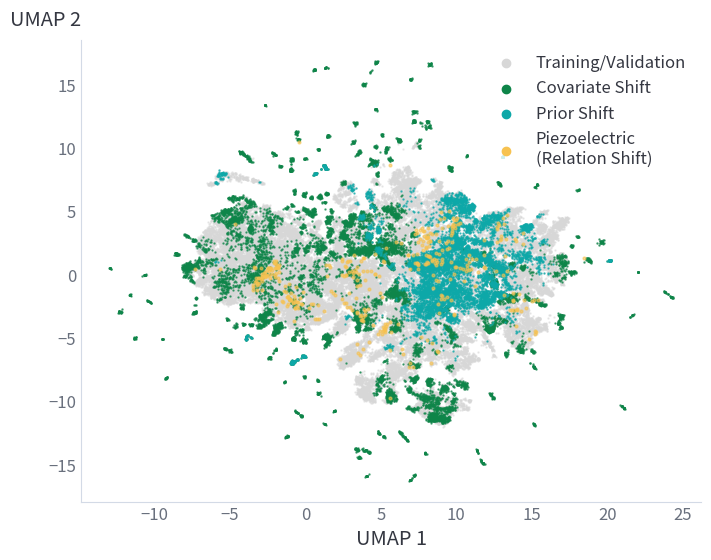

In [130]:
splits = {
    'Training/Validation': sup_data.query('training or Rsplt1 or Rsplt2 or Rsplt3 or Rsplt4 or Rsplt5'),
    'Covariate Shift': sup_data.query('Xshift_umap'),
    'Prior Shift': sup_data.query('infoY_delta_e'),
    'Piezoelectric\n(Relation Shift)': sup_data.query('piezo'),
}

split_kwargs = {
    'Training/Validation': {'alpha': 0.5},
    'Piezoelectric\n(Relation Shift)': {'s': 4, 'alpha': 0.6},
}

colors = ['#c5c5c5', *sns.color_palette('Accent', n_colors=len(splits))]

# FADCE9
# AED0EA
# 2E317C 
# ADD5A2
# 5DBE8A
# F7E8AA

colors = ['#d7d7d7', 
          '#0e8549',          
          '#0da8a8',
          '#f7c250',
          ]

for (name, split), color in zip(splits.items(), colors):
    kwargs = {'s': 0.5, 'color': color, 'alpha': 0.7}
    kwargs.update(split_kwargs.get(name, {}))
    plt.scatter(split['sup_umap_x'], split['sup_umap_y'], **kwargs)
    plt.scatter([], [], color=color, label=name)

plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/global_umap.png')

In [131]:
df = pd.read_csv('ablation.csv')
df = df.melt(id_vars=['type', 'epoch'], var_name='dataset', value_name='loss')

df['sal'] = df['type'].str.contains('Y info') | df['type'].str.contains('SAL')
df['type'] = df['type'].str.removeprefix('SAL ')
df['last'] = df['epoch'] == 'last'
df['ema'] = df['epoch'] == 'EMA'
fig_sets = {
    'train': 'Training',
    'piezo': "Piezoelectric\n(Relation Shift)",
    # 'Xshift_tsne': "X shift (TSNE)",
    'Xshift_umap': "Covariate Shift",
    # 'statY_delta_e': "Extreme ΔE\n(Prior Shift)",
    'infoY_delta_e': "Low ΔE\n(Prior Shift)",
    'statY_bandgap': "High-Bandgap\nMaterials",
    'rsplt_ave': 'Validation'
}
df['fig'] = df['dataset'].isin(fig_sets)
df['dataset'] = [fig_sets.get(x, x) for x in df['dataset']]
df['dataset_size'] = df['type'].str.extract(r'(\d+)x(\d+)').applymap(float).prod(axis=1)
df['type'] = df['type'].str.rstrip('1234567890x').str.removesuffix(' ')
df

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size
0,Y info,354,Training,0.1010,True,False,False,True,256.0
1,Y info,355,Training,0.1080,True,False,False,True,256.0
2,Y info,356,Training,0.0870,True,False,False,True,256.0
3,Y info,last,Training,0.0894,True,True,False,True,256.0
4,Y info,EMA,Training,0.0383,True,False,True,True,256.0
...,...,...,...,...,...,...,...,...,...
1615,baseline,last,Validation,0.0948,True,True,False,True,1.0
1616,baseline,EMA,Validation,0.0851,True,False,True,True,1.0
1617,Piezo2,211,Validation,0.1186,True,False,False,True,128.0
1618,Piezo2,last,Validation,0.1064,True,True,False,True,128.0


['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


/tmp/ipykernel_8499/1831943224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['theta'] = [col_x[c] for c in subs['dataset']]


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,theta
965,baseline,EMA,Covariate Shift,0.0841,False,False,True,True,1.0,0.000000
1289,baseline,EMA,High-Bandgap\nMaterials,0.1400,False,False,True,True,1.0,1.047198
1181,baseline,EMA,Low ΔE\n(Prior Shift),0.1602,False,False,True,True,1.0,2.094395
1505,baseline,EMA,Piezoelectric\n(Relation Shift),0.0840,False,False,True,True,1.0,3.141593
101,baseline,EMA,Training,0.0011,False,False,True,True,1.0,4.188790
1613,baseline,EMA,Validation,0.0830,False,False,True,True,1.0,5.235988
965,baseline,EMA,Covariate Shift,0.0841,False,False,True,True,1.0,6.283185


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,theta
968,baseline,EMA,Covariate Shift,0.0856,True,False,True,True,1.0,0.000000
1292,baseline,EMA,High-Bandgap\nMaterials,0.1388,True,False,True,True,1.0,1.047198
1184,baseline,EMA,Low ΔE\n(Prior Shift),0.1564,True,False,True,True,1.0,2.094395
1508,baseline,EMA,Piezoelectric\n(Relation Shift),0.0781,True,False,True,True,1.0,3.141593
104,baseline,EMA,Training,0.0061,True,False,True,True,1.0,4.188790
1616,baseline,EMA,Validation,0.0851,True,False,True,True,1.0,5.235988
968,baseline,EMA,Covariate Shift,0.0856,True,False,True,True,1.0,6.283185


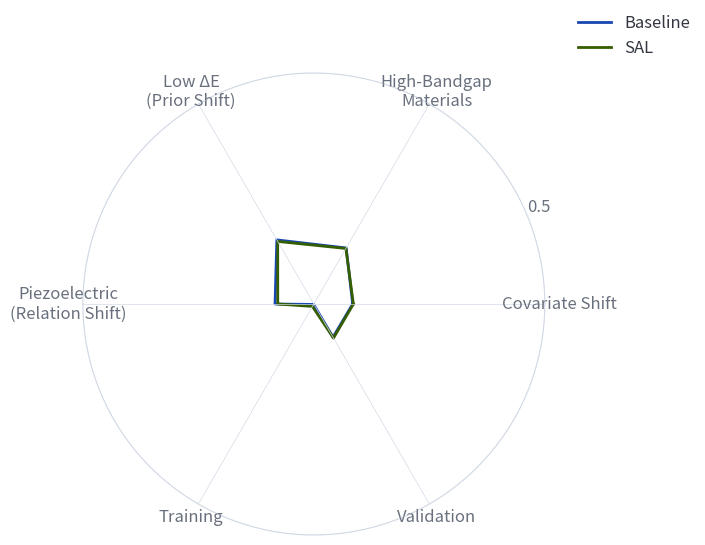

In [132]:
def radial_plot(subs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    cols = sorted(pd.unique(subs['dataset']))
    print(cols)
    n_cols = len(cols)
    col_x = {ds: i * 2 * np.pi / n_cols for i, ds in enumerate(cols)}
    subs['theta'] = [col_x[c] for c in subs['dataset']]

    for sal_val, color, label in zip((False, True), cs, ('Baseline', 'SAL')):
        group = subs.query('sal == @sal_val').sort_values('theta')
        last_row = group.iloc[[0]].copy()
        last_row['theta'] += 2 * np.pi
        group = pd.concat([group, last_row], axis=0)
        display(group)
        ax.plot(group['theta'], group['loss'], label=label, color=color, zorder=2, lw=2)

    fig.legend()
    ticks = list(col_x.values())
    ticklabels = list(col_x.keys())
    ax.set_xticks(ticks=ticks, labels=ticklabels)
    ax.set_thetamax(360)
    return fig, ax

subs = df.query('type == "baseline" and ema and fig')
fig, ax = radial_plot(subs)
ax.set_rticks([0.5])
ax.grid(lw=0.5)
fig.savefig('figs/radial_baseline.png')

/tmp/ipykernel_8499/3141866370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')


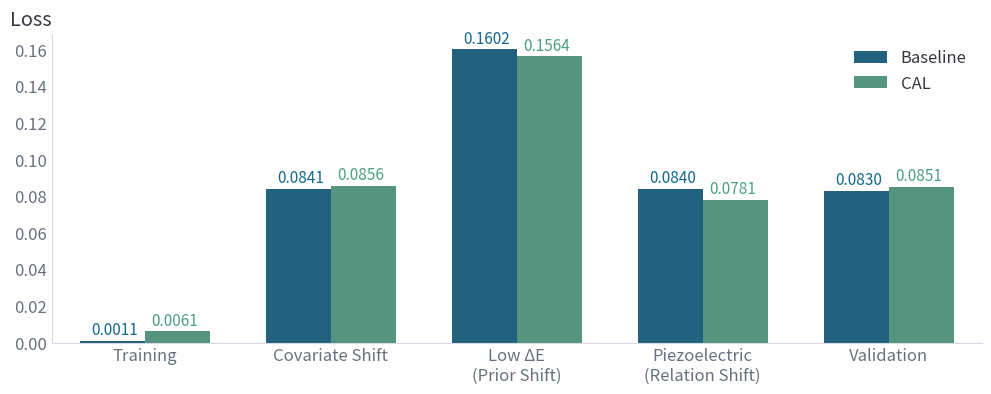

In [133]:
def normal_plot(subs):
    fig, ax = plt.subplots(figsize=(12, 4))
    subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')
    colors = sns.color_palette('rho_viridia', 2)    

    sns.barplot(subs, hue='CAL', x='dataset', y='loss', ax=ax, hue_order=['Baseline', 'CAL'], width=0.7,
                palette=colors)
    
    x_offset = 0.16         

    ymin, ymax = ax.get_ylim()
    y_offset = 0.02 * (ymax - ymin)
    
    for ds_i, ds in enumerate(pd.unique(subs['dataset'])):
        for method_i, method in enumerate(('Baseline', 'CAL')):
            rect: Rectangle = ax.patches[2 * ds_i + method_i]       
            loss = subs[(subs['dataset'] == ds) & (subs['sal'] == bool(method_i))]['loss'].iloc[0]             
            ax.text(x=ds_i + x_offset * (2 * method_i - 1), y=loss + y_offset, s=f'{loss:.04f}', ha='center',
                    color=colors[method_i], fontweight='bold', fontsize=11)     
    
    ax.set_xlabel('')
    ax.get_legend().set_title('')
    ax.get_legend().set_frame_on(False)
    ax.set_ylabel('Loss')
    rp.ylabel_top(ax)
    return fig, ax

fig, ax = normal_plot(subs[subs['dataset'] != "High-Bandgap\nMaterials"])

from matplotlib.patches import Rectangle
from matplotlib.axes import Axes

fig.savefig('figs/normal_baseline.png')

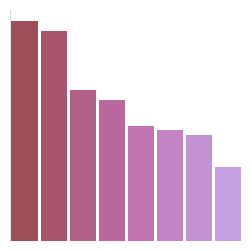

In [134]:
rng = np.random.default_rng(124)

xs = np.sort(rng.gamma(2, 1, size=8))[::-1] ** 0.4

pal = sns.cubehelix_palette(n_colors=len(xs), start=1.7, rot=-0.7, gamma=1, hue=1, light=0.7, dark=0.4)

fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(y=xs, x=np.arange(len(xs)), palette=pal, orient='v', width=0.9, hue=xs, legend=False, saturation=1)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
sns.despine(bottom=True)

plt.savefig('figs/err_fig.png')

In [135]:
df['CAL'] = np.where(df['sal'], 'CAL', 'Baseline')

dataset_target = df['type'].copy()
dataset_target.iloc[:] = ""
dataset_target.loc[(df['type'] == 'finetune') & (df['dataset_size'] == 1024)] = 'Low ΔE\n(Prior Shift)'
dataset_target.loc[(df['type'] == 'Y info') & (df['dataset_size'] == 1024)] = 'Low ΔE\n(Prior Shift)'
dataset_target.loc[(df['type'] == "Piezo2") & (df['dataset_size'] == 256)] = 'Piezoelectric\n(Relation Shift)'
dataset_target.loc[(df['type'] == "Finetune Piezo") & (df['dataset_size'] == 256)] = 'Piezoelectric\n(Relation Shift)'
dataset_target.loc[df['type'] == "Xumap"] = 'Covariate Shift'


df['target'] = dataset_target

targeted = df[df['target'] == df['dataset']].query('ema')
targeted

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target
952,Xumap,EMA,Covariate Shift,0.073838,False,False,True,True,1.0,Baseline,Covariate Shift
961,Xumap,EMA,Covariate Shift,0.064700,True,False,True,True,1.0,CAL,Covariate Shift
1118,finetune,EMA,Low ΔE\n(Prior Shift),0.015400,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift)
1180,Y info,EMA,Low ΔE\n(Prior Shift),0.009600,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift)
1459,Finetune Piezo,EMA,Piezoelectric\n(Relation Shift),0.117600,False,False,True,True,256.0,Baseline,Piezoelectric\n(Relation Shift)
1498,Piezo2,EMA,Piezoelectric\n(Relation Shift),0.033600,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift)


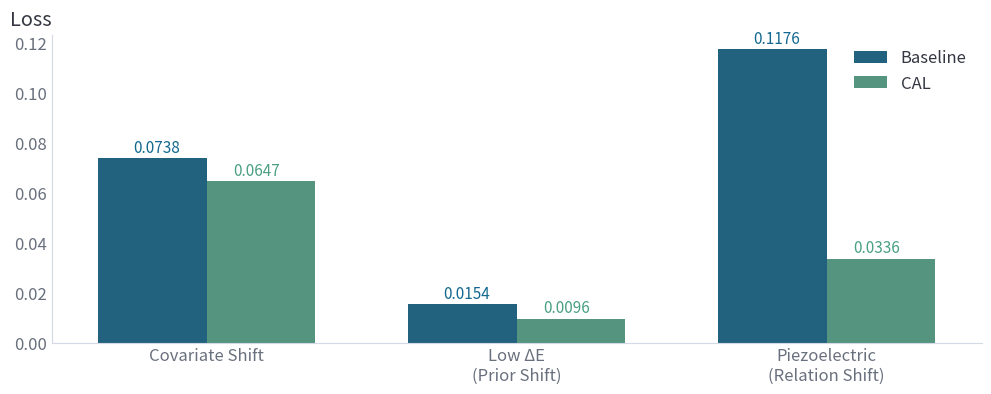

In [136]:
# fig, ax = plt.subplots(figsize=(9, 4))
# ax = sns.barplot(targeted, x='dataset', y='loss', hue='CAL',
#                  hue_order=('Baseline', 'CAL'), palette='rho_viridia')

# ax.get_legend().set_title('')
# ax.set_xlabel('')
# ax.set_ylabel('Loss')
# rp.ylabel_top()

fig, ax = normal_plot(targeted)

fig.savefig('figs/targeted.png')

In [158]:
tg = targeted.pivot_table(values='loss', index='dataset', columns='CAL')
display((tg['Baseline'] - tg['CAL']) / tg['Baseline'] * 100)
display((tg['Baseline'] - tg['CAL']))

dataset
Covariate Shift                    12.376204
Low ΔE\n(Prior Shift)              37.662338
Piezoelectric\n(Relation Shift)    71.428571
dtype: float64

dataset
Covariate Shift                    0.009138
Low ΔE\n(Prior Shift)              0.005800
Piezoelectric\n(Relation Shift)    0.084000
dtype: float64

In [137]:
df['post'] = df['type'].isin(('Y info', 'finetune'))
post = df.query('post')
post

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post
0,Y info,354,Training,0.1010,True,False,False,True,256.0,CAL,,True
1,Y info,355,Training,0.1080,True,False,False,True,256.0,CAL,,True
2,Y info,356,Training,0.0870,True,False,False,True,256.0,CAL,,True
3,Y info,last,Training,0.0894,True,True,False,True,256.0,CAL,,True
4,Y info,EMA,Training,0.0383,True,False,True,True,256.0,CAL,,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,finetune,best_vaild_0.0055_77,Validation,0.0774,False,False,False,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
1555,finetune,IR3_best_train_0.0003_119,Validation,0.0761,False,False,False,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
1610,Y info,119,Validation,0.1463,True,False,False,True,1024.0,CAL,Low ΔE\n(Prior Shift),True
1611,Y info,last,Validation,0.1304,True,True,False,True,1024.0,CAL,Low ΔE\n(Prior Shift),True


In [138]:
# sns.lineplot(post.query('fig and ema and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')
# sns.lineplot(post.query('fig and last and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post
38,finetune,EMA,Training,0.0142,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
100,Y info,EMA,Training,0.0412,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True
902,finetune,EMA,Covariate Shift,0.0923,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
964,Y info,EMA,Covariate Shift,0.1215,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True
1118,finetune,EMA,Low ΔE\n(Prior Shift),0.0154,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
1180,Y info,EMA,Low ΔE\n(Prior Shift),0.0096,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True
1226,finetune,EMA,High-Bandgap\nMaterials,0.0202,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
1288,Y info,EMA,High-Bandgap\nMaterials,0.0377,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True
1442,finetune,EMA,Piezoelectric\n(Relation Shift),0.0975,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True
1504,Y info,EMA,Piezoelectric\n(Relation Shift),0.0950,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True


['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post,theta
902,finetune,EMA,Covariate Shift,0.0923,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,0.000000
1226,finetune,EMA,High-Bandgap\nMaterials,0.0202,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,1.047198
1118,finetune,EMA,Low ΔE\n(Prior Shift),0.0154,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,2.094395
1442,finetune,EMA,Piezoelectric\n(Relation Shift),0.0975,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,3.141593
38,finetune,EMA,Training,0.0142,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,4.188790
1550,finetune,EMA,Validation,0.0806,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,5.235988
902,finetune,EMA,Covariate Shift,0.0923,False,False,True,True,1024.0,Baseline,Low ΔE\n(Prior Shift),True,6.283185


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post,theta
964,Y info,EMA,Covariate Shift,0.1215,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,0.000000
1288,Y info,EMA,High-Bandgap\nMaterials,0.0377,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,1.047198
1180,Y info,EMA,Low ΔE\n(Prior Shift),0.0096,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,2.094395
1504,Y info,EMA,Piezoelectric\n(Relation Shift),0.0950,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,3.141593
100,Y info,EMA,Training,0.0412,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,4.188790
1612,Y info,EMA,Validation,0.1041,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,5.235988
964,Y info,EMA,Covariate Shift,0.1215,True,False,True,True,1024.0,CAL,Low ΔE\n(Prior Shift),True,6.283185


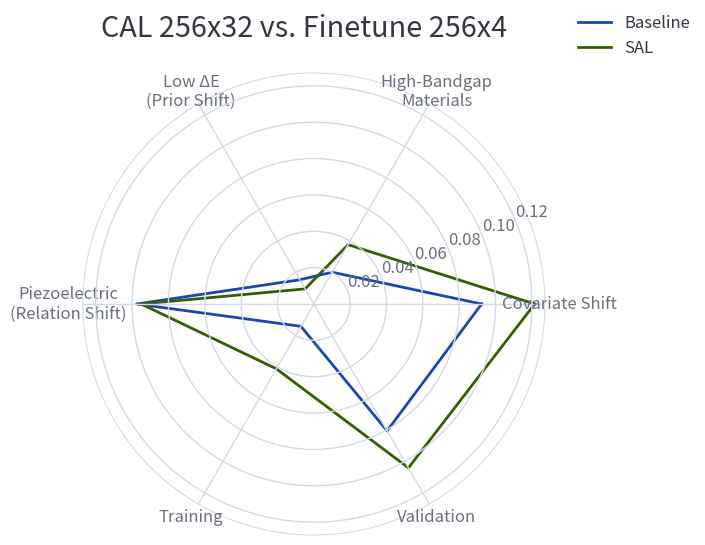

In [165]:
last_best = post.query('fig and ema')
last_best = last_best.query('(type == "finetune" and dataset_size == 1024) or (type == "Y info" and dataset_size == 1024)')
display(last_best)
fig, ax = radial_plot(last_best)
fig.suptitle('CAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/radial_infoy_last.png')

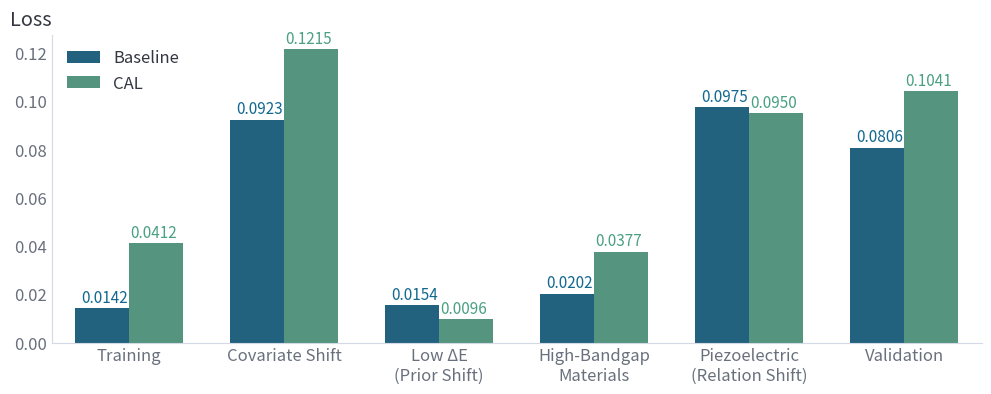

In [166]:
fig, ax = normal_plot(last_best)
# fig.suptitle('SAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/normal_infoy_last.png')

In [141]:
piezo_fig

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post,Training Data Size
1455,Finetune Piezo,EMA,Piezoelectric\n(Relation Shift),0.1042,False,False,True,True,128.0,Baseline,,False,128
1459,Finetune Piezo,EMA,Piezoelectric\n(Relation Shift),0.1176,False,False,True,True,256.0,Baseline,Piezoelectric\n(Relation Shift),False,256
1498,Piezo2,EMA,Piezoelectric\n(Relation Shift),0.0336,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False,256
1511,Piezo2,EMA,Piezoelectric\n(Relation Shift),0.0584,True,False,True,True,128.0,CAL,,False,128


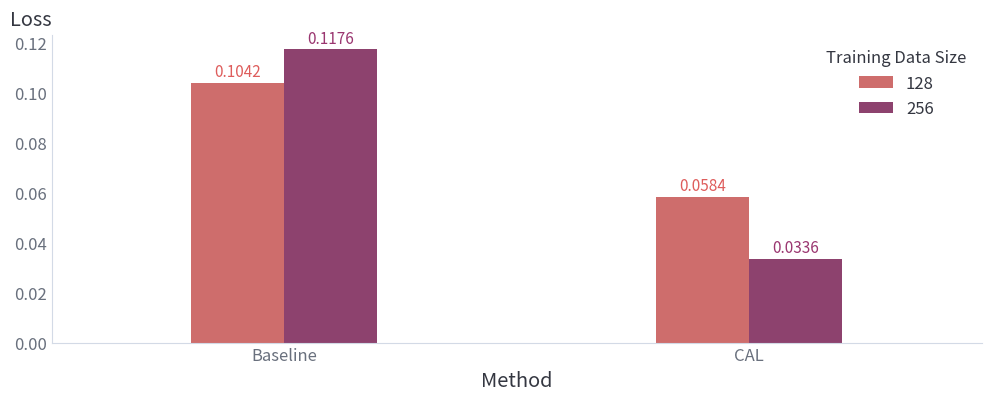

In [164]:
fig, ax = plt.subplots(figsize=(12, 4))
piezo = df[df['type'].str.contains('Piezo') & ~df['type'].str.contains('old')] 
piezo_fig = piezo[piezo['dataset'] == "Piezoelectric\n(Relation Shift)"].query('dataset_size > 1 and ema')
piezo_fig['Training Data Size'] = piezo_fig['dataset_size'].map(lambda x: f'{x:.0f}')
# piezo_fig = pd.concat([piezo_fig, pd.DataFrame({'type': ['Piezo2'], 'epoch': ['EMA'], 'dataset': ['Piezoelectric\n(Relation Shift)'], 'loss': [0.0548], 
#                                                 'sal': [True], 'last': [False], 'ema': [True], 'fig': [True], 'dataset_size': [128], 'CAL': ['CAL'], 
#                                                 'target': [''], 'post': [False], 'Training Data Size': ['128']}, index=[9999])])
sns.barplot(piezo_fig, hue='Training Data Size', x='CAL', y='loss', legend=True, ax=ax, width=0.4, palette='flare')
# ax.set_xticks(ax.get_xticks(), labels=['128', '256'])
# ax.set_xticks(ax.get_xticks(), labels=['Baseline', 'CAL'])
# ax.set_title('Piezoelectric Fine-tuning Performance')

colors = sns.color_palette('flare', 2)
x_offset = 0.1         

ymin, ymax = ax.get_ylim()
y_offset = 0.02 * (ymax - ymin)
for ds_i, ds in enumerate(pd.unique(piezo_fig['CAL'])):
    for method_i, method in enumerate((128, 256)):
        rect: Rectangle = ax.patches[2 * ds_i + method_i]
        loss = piezo_fig[(piezo_fig['CAL'] == ds) & (piezo_fig['dataset_size'] == method)]['loss'].iloc[0]             
        ax.text(x=ds_i + x_offset * (2 * method_i - 1), y=loss + y_offset, s=f'{loss:.04f}', ha='center',
                color=colors[method_i], fontweight=800, fontsize=11)  
ax.set_xlabel('Method')
ax.set_ylabel('Loss')
rp.ylabel_top()
fig.legend
fig.savefig('figs/piezo.png')

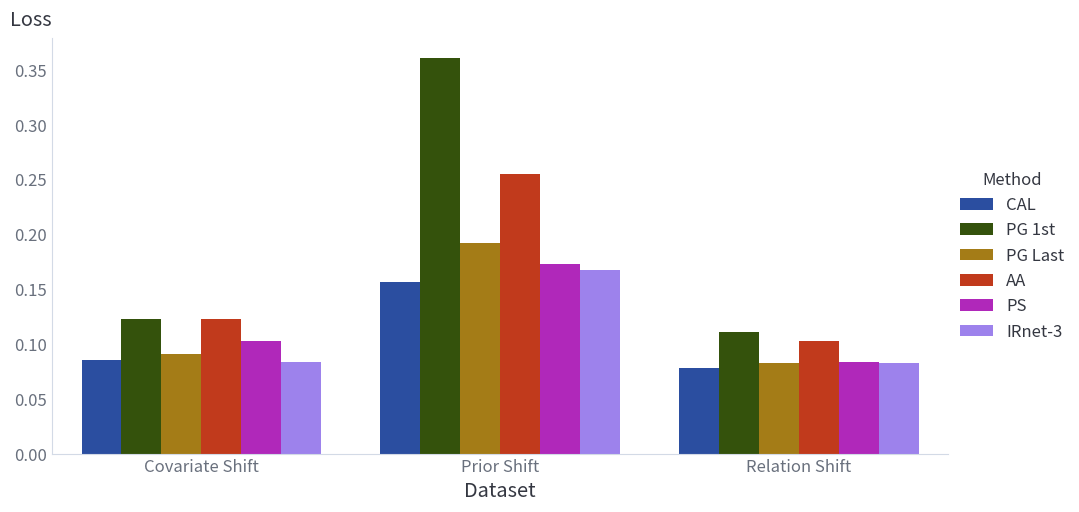

In [172]:
abl_df = pd.DataFrame({
         'Method': ['CAL', 'PG 1st', 'PG Last', 'AA', 'PS', 'IRnet-3'],
# 'Training Set':     [0.0061, 0.0296, 0.0071, 0.0487, 0.0204, 0.0059],
# 'Random Splitting': [0.0851, 0.1206, 0.0880, 0.1299, 0.0903, 0.0837],
'Covariate Shift':  [0.0856, 0.1230, 0.0907, 0.1226, 0.1030, 0.0832],
'Prior Shift':      [0.1564, 0.3609, 0.1919, 0.2548, 0.1729, 0.1676],
'Relation Shift':   [0.0781, 0.1111, 0.0826, 0.1027, 0.0839, 0.0822]})

abl_df = abl_df.melt(id_vars=['Method'], var_name='Dataset', value_name='Loss')

sns.catplot(abl_df, x='Dataset', y='Loss', hue='Method', kind='bar', aspect=2)
rp.ylabel_top()
plt.savefig('figs/ablation.png')

dataset,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,infoY_bandgap,infoY_delta_e,piezo,statY_bandgap,statY_delta_e
output,-1.461676,-1.466761,-1.457529,-1.438133,-1.448436,-1.607798,-1.140408,-2.118135,-2.791347,-1.594714,-2.102364,-1.579062
target,-1.480051,-1.485498,-1.470971,-1.445060,-1.466887,-1.691499,-1.120132,-2.518289,-3.298072,-1.617070,-2.602811,-1.127669
loss,0.093415,0.092270,0.097551,0.098377,0.097776,0.091241,0.110237,0.134595,0.180438,0.033638,0.186375,0.682105


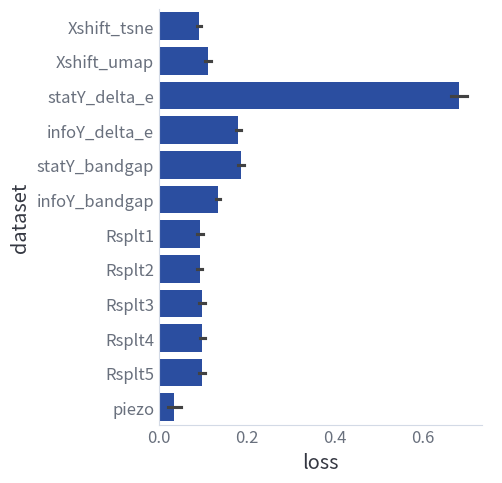

In [144]:
resdf = pd.read_feather('piezo_results_ema.feather')
display(resdf.groupby('dataset').mean().T)
sns.catplot(resdf, y='dataset', x='loss', kind='bar')

In [145]:
baseline_resdf = pd.read_feather('best_baseline_results_ema.feather')

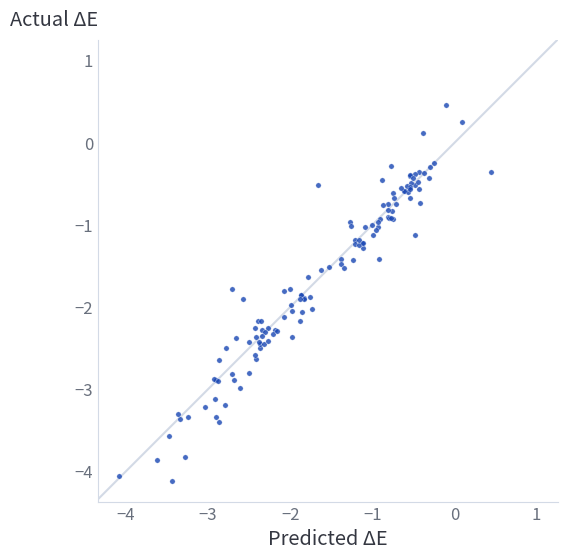

In [146]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', adjustable='box')
ax.axline((0, 0), (1, 1), c=plt.rcParams['axes.edgecolor'], zorder=-99)
sns.scatterplot(resdf.query('dataset == "piezo"'), x='output', y='target', label='CAL', ec=plt.rcParams['axes.facecolor'], s=15, alpha=0.8, ax=ax)
# sns.scatterplot(baseline_resdf.query('dataset == "piezo"'), x='output', y='target', label='Baseline', ec=plt.rcParams['axes.facecolor'], s=15, alpha=0.8, ax=ax)
ax.get_legend().set_visible(False)
ax.set_xlabel('Predicted ΔE')
ax.set_ylabel('Actual ΔE')
# plt.title('Predicted Formation Energy (Piezo)')
rp.ylabel_top(ax=ax)
fig.savefig('figs/piezo_scatter.png')

In [169]:
piezo.query('fig and ema and ((not sal and dataset_size == 128) or (sal and dataset_size == 256))')

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,CAL,target,post
51,Finetune Piezo,EMA,Training,0.0725,False,False,True,True,128.0,Baseline,,False
94,Piezo2,EMA,Training,0.0171,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False
915,Finetune Piezo,EMA,Covariate Shift,0.0893,False,False,True,True,128.0,Baseline,,False
958,Piezo2,EMA,Covariate Shift,0.1102,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False
1131,Finetune Piezo,EMA,Low ΔE\n(Prior Shift),0.0565,False,False,True,True,128.0,Baseline,,False
1174,Piezo2,EMA,Low ΔE\n(Prior Shift),0.1804,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False
1239,Finetune Piezo,EMA,High-Bandgap\nMaterials,0.0611,False,False,True,True,128.0,Baseline,,False
1282,Piezo2,EMA,High-Bandgap\nMaterials,0.1864,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False
1455,Finetune Piezo,EMA,Piezoelectric\n(Relation Shift),0.1042,False,False,True,True,128.0,Baseline,,False
1498,Piezo2,EMA,Piezoelectric\n(Relation Shift),0.0336,True,False,True,True,256.0,CAL,Piezoelectric\n(Relation Shift),False


/tmp/ipykernel_8499/3141866370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')


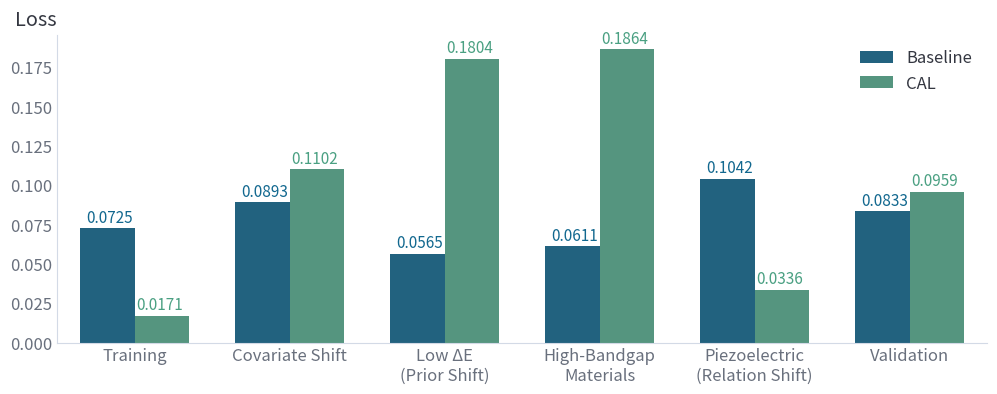

In [171]:
piezo_compare = piezo.query('fig and ema and ((not sal and dataset_size == 128) or (sal and dataset_size == 256))')
piezo_compare = piezo
fig, ax = normal_plot(piezo.query('fig and ema and ((not sal and dataset_size == 128) or (sal and dataset_size == 256))'))
# ax.set_title('Piezoelectric Fine-Tuning')
fig.savefig('figs/normal_piezo.png')

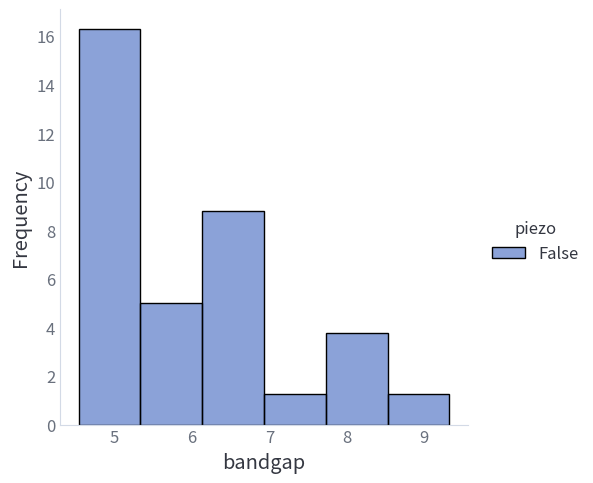

In [148]:
sns.displot(data.query('dataset_split == 7 and statY_bandgap'), x='bandgap', hue='piezo', stat='frequency')

In [149]:
from pathlib import Path

results = {}
for feather in Path('exps/results').glob('*.feather'):
    results[feather.name] = pd.read_feather(feather)

{k: len(v.index) for k, v in results.items()}

{}

In [150]:
!ls exps/

delta_e_02-23-14-26  delta_e_02-26-15-03	  delta_e_piezo_128
delta_e_02-23-15-45  delta_e_02-26-15-04	  delta_e_piezo_2
delta_e_02-23-16-02  delta_e_02-26-15-20	  delta_e_smoke-test
delta_e_02-23-16-08  delta_e_05-16-15-22	  exps
delta_e_02-23-16-14  delta_e_05-16-17-51	  exp_to_compare_with_yours
delta_e_02-23-16-21  delta_e_baseline_attempt4	  exp_to_compare_with_yours.zip
delta_e_02-23-16-34  delta_e_baseline_no_weights
delta_e_02-23.zip    delta_e_piezo


In [151]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

FileNotFoundError: [Errno 2] No such file or directory: 'exps/results/delta_e_Yinfo_256x1.feather'

In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x4.feather')
# infoy.sort_values('infoY_delta_e')
infoy.sort_values('infoY_delta_e')

In [ ]:
staty = df[df['type'].str.contains('statY', case=False)]
staty

In [ ]:
fig, ax = plt.subplots()
sns.barplot(staty.query('dataset == "Extreme ΔE" and last'), hue='sal', x='dataset_size', y='loss', legend=True, ax=ax)
ax.set_title('Extreme ΔE Fine-tuning Performance')
fig.savefig('figs/staty.png')

In [ ]:
fig, ax = normal_plot(staty.query('fig and last and dataset_size != 256'))
# ax.set_title('Extreme ΔE Fine-Tuning')
fig.savefig('figs/normal_staty.png')

In [ ]:

from pathlib import Path

from tomllib import load

res = []

for fn in Path('exps/results').glob('*.feather'):
    if 'early_stop' in fn.name:
        continue
    toml_fn = fn.with_suffix('.toml')
    with open(toml_fn, 'rb') as toml_f:
        toml = load(toml_f)
        res_df = pd.read_feather(fn)
        res_df['exp_id'] = fn.stem
        res_df['exp'] = toml['log']['exp_name']
        res_df['adv_data'] = toml.get('adv_train_data', 'Baseline')
        res_df['batch_size'] = toml['data']['batch_size']
        res_df['batch_num'] = toml['data']['num_sal_samples'] // res_df['batch_size']
        res_df['total_size'] = toml['data']['num_sal_samples']
        res_df['target'] = toml['target']['col_name']
        res_df['ema'] = pd.isna(res_df['Partial_train'])
        res.append(res_df)


res = pd.concat(res)

In [ ]:
res

In [ ]:
sns.relplot(res, x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5, lw=1)
plt.ylim(0, 0.2)

In [ ]:
res.query('not ema').sort_values('infoY_delta_e', ascending=True).groupby('exp_id').first()[['infoY_delta_e', 'epoch', 'adv_data']]

In [ ]:
sns.relplot(res.query('adv_data == "piezo" or adv_data == "Baseline"'), x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5)

In [ ]:
infoy = res.query('adv_data == "infoY_delta_e" and epoch < 400')
sns.relplot(infoy, x='epoch', y='infoY_delta_e', hue='total_size', kind='line', aspect=2, height=5)
plt.yscale('log')

Change high-bandgap: make clear it's a dataset

Change gradient section

Change validation

bandgap plot

distribution loss

compare both models
